In [23]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import pandas as pd
import os

from keras.preprocessing import sequence
np.random.seed(7)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14231207852805951879
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1444338073
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7517255807016709990
physical_device_desc: "device: 0, name: GeForce 940MX, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


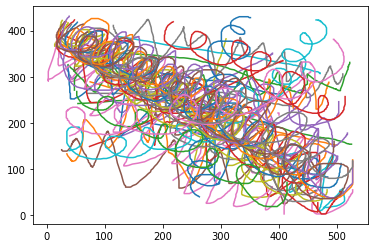

In [24]:
X=[]
y=[]
base_path='dataset/'
source_path=base_path
for child in os.listdir(source_path):
    sub_path = os.path.join(source_path, child)
    if os.path.isdir(sub_path):
        for data_file in os.listdir(sub_path):
            file_path = os.path.join(sub_path, data_file)
            #print(file_path)
            data=pd.read_csv(file_path,header=None)
            data=data.to_numpy()
            X.append(data)
            y.append(child)
from matplotlib import pyplot as plt
for x in X:
    plt.plot(x[:,0],x[:,1])
plt.show()

In [25]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y = lb.fit_transform(y)


In [26]:
max_review_length = 300
X_tr = sequence.pad_sequences(X, maxlen=max_review_length)


In [30]:

modelClass = Sequential()
modelClass.add(LSTM(100, return_sequences=True, input_shape=(300,2)))
modelClass.add(LSTM(50, return_sequences=True, activation='relu'))
modelClass.add(LSTM(20, return_sequences=True, activation='relu'))
modelClass.add(LSTM(10, activation='relu'))
modelClass.add(Dense(3, activation='sigmoid'))
modelClass.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(modelClass.summary())
modelClass.fit(X_tr, y, epochs=30, batch_size=16)


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 300, 100)          41200     
_________________________________________________________________
lstm_26 (LSTM)               (None, 300, 50)           30200     
_________________________________________________________________
lstm_27 (LSTM)               (None, 300, 20)           5680      
_________________________________________________________________
lstm_28 (LSTM)               (None, 10)                1240      
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 33        
Total params: 78,353
Trainable params: 78,353
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
48/48 [==============================] - 10s 203ms/step - loss: 0.6987 - accuracy: 0.4097
Epoch 2/30

In [28]:

scores = modelClass.evaluate(X_tr, y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 0.00%
